In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('titanic.csv')
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
83,84,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
508,509,0,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.7500,NaN,Q


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
age_null_mask = data['Age'].isnull()
age_mean = data['Age'].mean()
age_std = data['Age'].std()
age_random = np.random.normal(loc=age_mean, scale=age_std, size=age_null_mask.sum())
data.loc[age_null_mask, 'Age'] = age_random

In [5]:
age_random.size

177

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

data.drop(columns=['Cabin'], inplace=True)

data.dropna(inplace=True)

In [10]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: xlabel='Sex', ylabel='Age'>

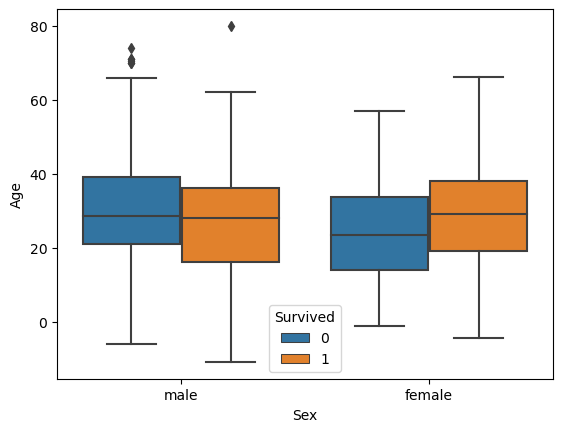

In [11]:
sns.boxplot(x='Sex', y='Age', hue='Survived', data=data)